In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

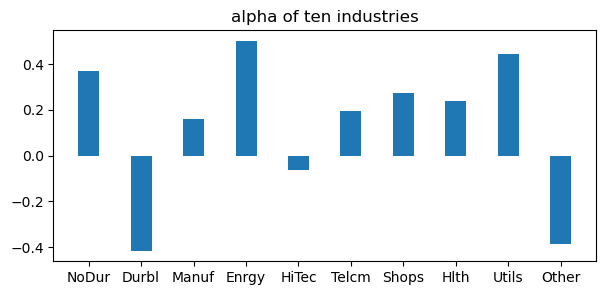

In [3]:
# import dataframe
df_industries = pd.read_excel("Industry_Portfolios.xlsx",index_col = "Date")
df_markets = pd.read_excel("Market_Portfolio.xlsx",index_col = "Date")

# put industries'name to a list 
ten_industries_list = df_industries.columns.tolist()

Rf = 0.13

# use OLS regression to estimate alpha and beta
# then form a dataframe contains alpha and beta of ten industries
def multi_coefficient(industries_list):
    def coefficient(company):
        industry_excess_return = df_industries[company] - Rf
        market_excess_return = df_markets["Market"] - Rf
        market_excess_return = sm.add_constant(market_excess_return)
        model = sm.OLS(industry_excess_return,market_excess_return).fit()
        alpha = model.params[0]
        beta = model.params[1]
        return alpha,beta
    
    interim = list(map(coefficient,industries_list))
    return pd.DataFrame(interim,
                        index = ten_industries_list,
                        columns = ["alpha","beta"])

market_model = multi_coefficient(ten_industries_list)
market_model

#plot alphas of ten industries
plt.figure(figsize = (7,3))
plt.bar(market_model["alpha"].index,market_model["alpha"],width = 0.4)
plt.xticks(rotation = 0)
plt.title("alpha of ten industries")
plt.show()


# calculate the alpha and beta of market using OLS regression
industry_excess_return_11 = df_markets["Market"] - Rf
market_excess_return_11 = df_markets["Market"] - Rf
market_excess_return_11 = sm.add_constant(market_excess_return_11)
model = sm.OLS(industry_excess_return_11,market_excess_return_11).fit()
alpha_11 = model.params[0]
beta_11 = model.params[1]
market_pred = pd.DataFrame({"alpha":alpha_11,"beta":beta_11},index = ["market"])

# put the results of ten industries and market together
market_model_11 = pd.concat([market_model,market_pred])

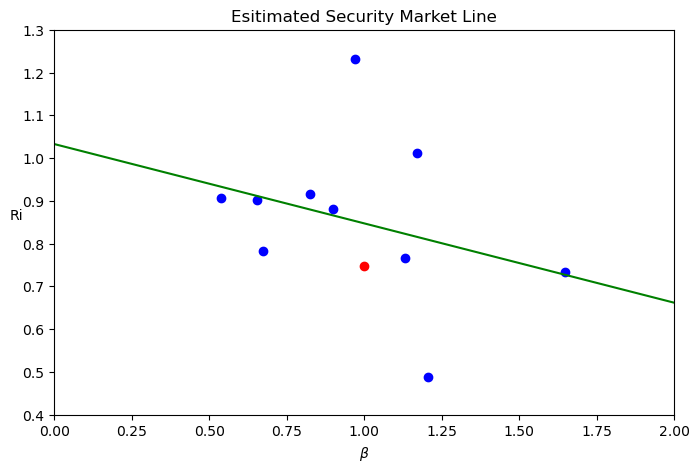

In [4]:
# use OLS regression to estimate the Security Market Line
# Calculate the mean of ten industries and market
industries_mean = df_industries.mean().to_frame()
market_mean = df_markets.mean().to_frame()
all_mean = pd.concat([industries_mean,market_mean])
all_mean.columns = ["mean"] # rename the column
all_mean = all_mean.reset_index() 

# copy the dataframe
all_data = all_mean
# add beta data into the all_data dataframe
all_data["beta"] = market_model_11["beta"].tolist()

# use OLS regression to estimate the SML
x = sm.add_constant(all_data["beta"])
y = all_data["mean"]
model_SML = sm.OLS(y,x).fit()
a = model_SML.params[1]
b = model_SML.params[0]

# plot the Esitimated Security Market line
plt.figure(figsize = (8,5))
plt.scatter(x = all_data["beta"][ :-1],y = all_data["mean"][ :-1],color = "blue")
plt.scatter(all_data["beta"].iloc[-1],all_data["mean"].iloc[-1],color = "red")
plt.plot([0,2],[b,a * 2 + b],color = "green")
plt.xlabel("$\\beta$")
plt.ylabel("Ri",rotation = 0)
plt.xlim(0,2)
plt.ylim(0.4,1.3)
plt.title("Esitimated Security Market Line")
plt.show()